## Face Recognition 
Face Recognition library of python is the world’s simplest face recognition library. Built using dlib’s state-of-the-art face recognition
built with deep learning

## Steps in Face Recognition
### Face Detection:
The very first task we perform is detecting faces in the image or video stream. Now that we know the exact location/coordinates of face, we extract this face for further processing ahead.
### Feature Extraction:
Now that we have cropped the face out of the image, we extract features from it. Here we are going to use face embeddings to extract the features out of the face. A neural network takes an image of the person’s face as input and outputs a vector which represents the most important features of a face. In machine learning, this vector is called embedding and thus we call this vector as face embedding.<br>
While training the neural network, the network learns to output similar vectors for faces that look similar. For example, if I have multiple images of faces within different timespan, of course, some of the features of my face might change but not up to much extent. So in this case the vectors associated with the faces are similar or in short, they are very close in the vector space. <br>
Now after training the network, the network learns to output vectors that are closer to each other(similar) for faces of the same person(looking similar).<br>
We are not going to train such a network here as it takes a significant amount of data and computation power to train such networks. We will use a pre-trained network trained by Davis King on a dataset of ~3 million images. The network outputs a vector of 128 numbers which represent the most important features of a face.
Now that we know how this network works, let us see how we use this network on our own data. We pass all the images in our data to this pre-trained network to get the respective embeddings and save these embeddings in a file for the next step.
    
### Comparing faces:
Now that we have face embeddings for every face in our data saved in a file, the next step is to recognise a new t image that is not in our data. So the first step is to compute the face embedding for the image using the same network we used above and then compare this embedding with the rest of the embeddings we have. We recognise the face if the generated embedding is closer or similar to any other embedding

In [2]:
# Import all the needed tools
import cv2
import numpy as np
import face_recognition
import matplotlib.pyplot as plt

In [3]:
# load the img
imgElon=face_recognition.load_image_file(r'C:\Users\DELL\Desktop\Computer-Vision-with-OpenCV-and-Deep-Learning\Face-Recognition\Images\elon2.jpg')

In [8]:
# Change image's color channel from bgr to rgb
imgElon=cv2.cvtColor(imgElon,cv2.COLOR_BGR2RGB)

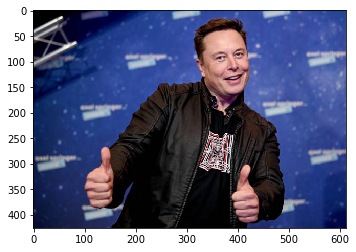

In [9]:
plt.imshow(imgElon)

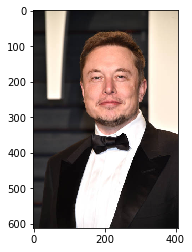

In [10]:
# Test image 
testElon=face_recognition.load_image_file(r'C:\Users\DELL\Desktop\Computer-Vision-with-OpenCV-and-Deep-Learning\Face-Recognition\Images\elon3.jpg')

plt.imshow(testElon)

### Now that we have loaded the image, let's detect the faces in the image using face_location method from face recognition
Returns an array of bounding boxes of human faces in a image

In [11]:
faceLoc=face_recognition.face_locations(imgElon)

In [12]:
# Now let's draw a rectangle around the face of the elon 

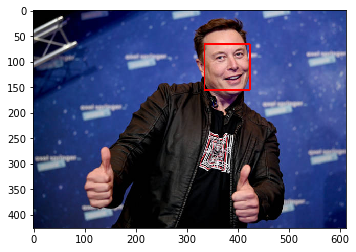

In [13]:
cv2.rectangle(imgElon,(faceLoc[0][3],faceLoc[0][0]),(faceLoc[0][1],faceLoc[0][2]),(255,0,0),2)
plt.imshow(imgElon);

In [14]:
# face location of test image of Elon

In [15]:
testLoc=face_recognition.face_locations(testElon)

### Face Encodings

In [16]:
encodeElon=face_recognition.face_encodings(imgElon)[0]
encodetest=face_recognition.face_encodings(testElon)[0]

### Compare Faces

In [18]:
results=face_recognition.compare_faces([encodeElon],encodetest)

In [19]:
print(results)

[True]


### Face Distance
Given a list of face encodings, compare them to a known face encoding and get a euclidean distance for each comparison face. The distance tells you how similar the faces are.

In [20]:
face_dist=face_recognition.face_distance([encodeElon],encodetest)
print(face_dist)

[0.44090722]


<strong>Lower the distance the better is the match</strong>

In [35]:
# Now let's show the results on the image
cv2.putText(testElon,f"{results} {round(face_dist[0],2)}",(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),3)

array([[[ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14],
        ...,
        [204, 188, 165],
        [203, 187, 164],
        [203, 187, 164]],

       [[ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [205, 189, 166],
        [204, 188, 165],
        [203, 187, 164]],

       [[ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17],
        ...,
        [206, 190, 167],
        [205, 189, 166],
        [204, 188, 165]],

       ...,

       [[ 39,  38,  36],
        [ 38,  37,  35],
        [ 37,  36,  34],
        ...,
        [ 12,  12,  14],
        [ 12,  12,  14],
        [ 12,  12,  14]],

       [[ 38,  37,  35],
        [ 38,  37,  35],
        [ 37,  36,  34],
        ...,
        [ 12,  12,  14],
        [ 12,  12,  14],
        [ 12,  12,  14]],

       [[ 38,  37,  35],
        [ 37,  36,  34],
        [ 36,  35,  33],
        ...,
        [ 12,  12,  14],
        [ 12,  12,  14],
        [ 12,  12,  14]]

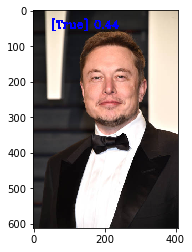

In [36]:
plt.imshow(testElon)

What if  we try to match Elon's face to some other person's face

In [52]:
testother=face_recognition.load_image_file(r'C:\Users\DELL\Desktop\Computer-Vision-with-OpenCV-and-Deep-Learning\Face-Recognition\Images\mark.jpg')

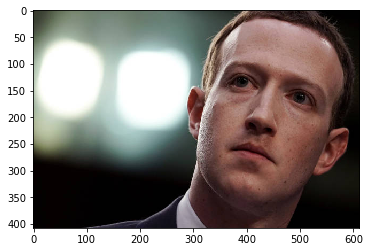

In [53]:
plt.imshow(testother);

In [54]:
encodeother=face_recognition.face_encodings(testother)[0]

In [55]:
results1=face_recognition.compare_faces([encodeElon],encodeother)

In [56]:
print(results1)

[False]


In [57]:
face_dist1=face_recognition.face_distance([encodeElon],encodeother)

In [58]:
cv2.putText(testother,f"{results1} {round(face_dist1[0])}",(40,40),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)

array([[[53, 55, 42],
        [53, 55, 42],
        [54, 56, 43],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[53, 55, 42],
        [54, 56, 43],
        [54, 56, 43],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[54, 56, 43],
        [54, 56, 43],
        [55, 57, 44],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[ 3,  1,  2],
        [ 3,  1,  2],
        [ 3,  1,  2],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 3,  1,  2],
        [ 3,  1,  2],
        [ 3,  1,  2],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 3,  1,  2],
        [ 3,  1,  2],
        [ 3,  1,  2],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]]], dtype=uint8)

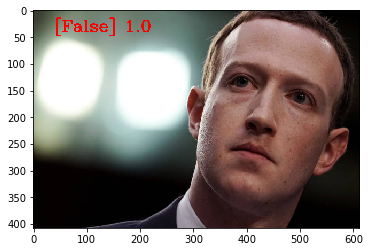

In [59]:
plt.imshow(testother)